<a href="https://colab.research.google.com/github/namratha-mlflow/mlflow-mlproject-example/blob/main/NLP_Pickle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
esg_urls = ['/content/drive/MyDrive/NLPFolder/America.pdf',
            '/content/drive/MyDrive/NLPFolder/Barclays2019.pdf',
            '/content/drive/MyDrive/NLPFolder/apollo.pdf',
            '/content/drive/MyDrive/NLPFolder/goldman.pdf',
            '/content/drive/MyDrive/NLPFolder/hsbc.pdf',
            '/content/drive/MyDrive/NLPFolder/jpmc2019.pdf'
]

for x in esg_urls:
  print(x)

company = ['america','barclays','apollo','goldman','hsbc','jpmc2019']

/content/drive/MyDrive/NLPFolder/America.pdf
/content/drive/MyDrive/NLPFolder/Barclays2019.pdf
/content/drive/MyDrive/NLPFolder/apollo.pdf
/content/drive/MyDrive/NLPFolder/goldman.pdf
/content/drive/MyDrive/NLPFolder/hsbc.pdf
/content/drive/MyDrive/NLPFolder/jpmc2019.pdf


In [ ]:
!pip install PyPDF2
import PyPDF2

def extractPdf(pathLink):
  try:
    print(pathLink)
    pdfFileObj = open(pathLink,'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    text = [pdfReader.getPage(i).extractText() for i in range(0, pdfReader.getNumPages())]
    return "\n".join(text)
  except:
    return ""

     |████████████████████████████████| 77 kB 2.8 MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61101 sha256=2a61b67434a5589a8d6cbb88983a41da0210d74abef435ba0b4099cc3add334e
  Stored in directory: /root/.cache/pip/wheels/80/1a/24/648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2


In [ ]:
transcripts = [extractPdf(u) for u in esg_urls]
print(transcripts)
print(len(transcripts))

/content/drive/MyDrive/NLPFolder/America.pdf
/content/drive/MyDrive/NLPFolder/Barclays2019.pdf
/content/drive/MyDrive/NLPFolder/apollo.pdf


/content/drive/MyDrive/NLPFolder/goldman.pdf
/content/drive/MyDrive/NLPFolder/hsbc.pdf
/content/drive/MyDrive/NLPFolder/jpmc2019.pdf
['1Bank of America Corporation 2017 Environmental, Social & Governance Performance Data Summary\n\nESG Goals & Progress2$2 billion in philanthropic investments globally\n2019In 2017, Bank of America provided nearly $200 million  \n\nin global philanthropic investments, including cash giving \n\nand in-kind donations. To date we™ve delivered $1.87 billion \n\ntoward our ten year $2 billion goal (2009-2018).\nOn track2 million hours of volunteer \n\nservice annually and engage  \nour employees to be more \n\nactive citizens\nN/AOur employee volunteers contributed nearly 2 million hours \n\nin 2017 addressing a range of community needs, including \nmentoring youth, packing food donations, teaching better \n\n\nOn track$1.5 trillion for community \n\ndevelopment lending and \n\ninvestments in the U.S.\n2019Since 2009, we™ve extended $910 billion in community 

In [ ]:
# Dump to pickle file
import os
import pickle

# Make a directory for saving txt files for pdf
path = "drive/MyDrive/NLPFolder/transcripts/"
os.mkdir(path)

 
# Dump pickle file for later use
for i,c in enumerate(company):
  with open("/content/drive/MyDrive/NLPFolder/transcripts/"+ c + ".txt","wb") as file:
    pickle.dump(transcripts[i],file)


In [ ]:
# Load pickle files

data = {}

for i,c in enumerate(company):
  with open("/content/drive/MyDrive/NLPFolder/transcripts/"+ c + ".txt","rb") as file:
    data[c] = pickle.load(file)

In [ ]:
data.keys()

# Double check
#data['america'][:2]

dict_keys(['america', 'barclays', 'apollo', 'goldman', 'hsbc', 'jpmc2019'])

In [ ]:
data['america'][:55]

'1Bank of America Corporation 2017 Environmental, Social'

In [ ]:
# Check on data
next(iter(data.keys()))

'america'

In [ ]:
#  check on values
next(iter(data.values()))

'1Bank of America Corporation 2017 Environmental, Social & Governance Performance Data Summary\n\nESG Goals & Progress2$2 billion in philanthropic investments globally\n2019In 2017, Bank of America provided nearly $200 million  \n\nin global philanthropic investments, including cash giving \n\nand in-kind donations. To date we™ve delivered $1.87 billion \n\ntoward our ten year $2 billion goal (2009-2018).\nOn track2 million hours of volunteer \n\nservice annually and engage  \nour employees to be more \n\nactive citizens\nN/AOur employee volunteers contributed nearly 2 million hours \n\nin 2017 addressing a range of community needs, including \nmentoring youth, packing food donations, teaching better \n\n\nOn track$1.5 trillion for community \n\ndevelopment lending and \n\ninvestments in the U.S.\n2019Since 2009, we™ve extended $910 billion in community \n\ndevelopment lending and investments in the U.S., including \n\napproximately $54 billion in 2017.This totals Œ on average Œ approx

In [ ]:
# Function for combine text key: company to string format
import string
def combine_text(list_of_text):
  # Takes a list of text and combine them into one large chunk of text
  """remove non ascii value here set(string.printable"""
  printable = set(string.printable)
  return ''.join(filter(lambda x: x in printable, list_of_text))
  #combined_text = ''.join(list_of_text)
  #return combined_text

In [ ]:
# Implement tokentizer everything here only
data_combined = {key:''+combine_text(value)+'' for (key,value) in data.items()}
data_combined

{'america': '1Bank of America Corporation 2017 Environmental, Social & Governance Performance Data Summary\n\nESG Goals & Progress2$2 billion in philanthropic investments globally\n2019In 2017, Bank of America provided nearly $200 million  \n\nin global philanthropic investments, including cash giving \n\nand in-kind donations. To date weve delivered $1.87 billion \n\ntoward our ten year $2 billion goal (2009-2018).\nOn track2 million hours of volunteer \n\nservice annually and engage  \nour employees to be more \n\nactive citizens\nN/AOur employee volunteers contributed nearly 2 million hours \n\nin 2017 addressing a range of community needs, including \nmentoring youth, packing food donations, teaching better \n\n\nOn track$1.5 trillion for community \n\ndevelopment lending and \n\ninvestments in the U.S.\n2019Since 2009, weve extended $910 billion in community \n\ndevelopment lending and investments in the U.S., including \n\napproximately $54 billion in 2017.This totals  on average

In [ ]:
import pandas as pd

print(pd.__version__)

1.1.5


In [ ]:
# Putting it into pandas dataframe
!pip install pandas

import pandas 
from pandas import DataFrame
pandas.set_option("max_colwidth",150)
data_df = DataFrame(data_combined.items(), columns=['Company', 'Content']).convert_dtypes(convert_string=True)
list(data_df)
data_df

#Optional code for other approach"""
#data_df.columns=['content']
#data_df.content.str.split(expand=True)
##data_df = data_df.sort_index()
#data_df df['Content'] = df['Content'].astype('str') 
#list(data_df)


,Company,Content
0,america,"1Bank of America Corporation 2017 Environmental, Social & Governance Performance Data Summary ESG Goals & Progress2$2 billion in philanthropic in..."
1,barclays,Barclays PLC Environmental Social Governance Report 2019 Barclays PLC Environmental Social Governance Report 2019 FOR OUR CUSTOME...
2,apollo,"2018 ESG Summary Annual Report The ESG Opportunity How Apollo Drives Change Responsible investment (RI) considers how environmental, social, an..."
3,goldman,Goldman Sachs 2019 Sustainability Report SUSTAINABLE FINANCE THE IMPERATIVE AND THE OPPORTUNITY 246 METRICS49 RECOGNITION51 SASB INDEX56 TCFD APP...
4,hsbc,"HSBC Holdings plc Environmental, Social and Governance Update April 2019 Connecting customers with opportunities HSBC aims to be where the gro..."
5,jpmc2019,Environmental Social & Governance Report 2019 Message from Our Chairman & CEO As the world contends with the human and economic impacts of t...


In [ ]:
# From custom integration

In [ ]:
# Download spacy
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

In [ ]:
import spacy
# test spacy
nlp = spacy.load("en_core_web_sm", disable=['ner'])

In [ ]:
data_df

,Company,Content
0,america,"1Bank of America Corporation 2017 Environmental, Social & Governance Performance Data Summary ESG Goals & Progress2$2 billion in philanthropic in..."
1,barclays,Barclays PLC Environmental Social Governance Report 2019 Barclays PLC Environmental Social Governance Report 2019 FOR OUR CUSTOME...
2,apollo,"2018 ESG Summary Annual Report The ESG Opportunity How Apollo Drives Change Responsible investment (RI) considers how environmental, social, an..."
3,goldman,Goldman Sachs 2019 Sustainability Report SUSTAINABLE FINANCE THE IMPERATIVE AND THE OPPORTUNITY 246 METRICS49 RECOGNITION51 SASB INDEX56 TCFD APP...
4,hsbc,"HSBC Holdings plc Environmental, Social and Governance Update April 2019 Connecting customers with opportunities HSBC aims to be where the gro..."
5,jpmc2019,Environmental Social & Governance Report 2019 Message from Our Chairman & CEO As the world contends with the human and economic impacts of t...


In [ ]:
"""(data_df.set_index(['Company'])
   .apply(lambda x: extract_statements(nlp,x).explode())
   .reset_index())"""

data_df = (data_df.set_index(['Company'])
   .apply(lambda x: x.str.split('\n').explode())
   .reset_index())


data_df = data_df.dropna()
data_df 

,Company,Content
0,america,"1Bank of America Corporation 2017 Environmental, Social & Governance Performance Data Summary"
1,america,
2,america,ESG Goals & Progress2$2 billion in philanthropic investments globally
3,america,"2019In 2017, Bank of America provided nearly $200 million"
4,america,
...,...,...
29182,jpmc2019,".JPMorgan Chase, J.P. Morgan, Chase, the Octagon symbol and other words or symbols in this report that"
29183,jpmc2019,identify JPMorgan Chase services are service marks of JPMorgan Chase & Co. Other words or symbols in this
29184,jpmc2019,
29185,jpmc2019,report that identify other parties goods or services may be trademarks or service marks of those other parties.


In [ ]:
 # Start from here (Cleaning)
import numpy as np
data_df['Content'].replace('', np.nan, inplace=True)
data_df

 

,Company,Content
0,america,"1Bank of America Corporation 2017 Environmental, Social & Governance Performance Data Summary"
1,america,NaN
2,america,ESG Goals & Progress2$2 billion in philanthropic investments globally
3,america,"2019In 2017, Bank of America provided nearly $200 million"
4,america,NaN
...,...,...
29182,jpmc2019,".JPMorgan Chase, J.P. Morgan, Chase, the Octagon symbol and other words or symbols in this report that"
29183,jpmc2019,identify JPMorgan Chase services are service marks of JPMorgan Chase & Co. Other words or symbols in this
29184,jpmc2019,NaN
29185,jpmc2019,report that identify other parties goods or services may be trademarks or service marks of those other parties.


In [ ]:
data_df.dropna(subset=['Content'], inplace=True)
data_df

,Company,Content
0,america,"1Bank of America Corporation 2017 Environmental, Social & Governance Performance Data Summary"
2,america,ESG Goals & Progress2$2 billion in philanthropic investments globally
3,america,"2019In 2017, Bank of America provided nearly $200 million"
5,america,"in global philanthropic investments, including cash giving"
7,america,and in-kind donations. To date weve delivered $1.87 billion
...,...,...
29180,jpmc2019,. Information about JPMorgan Chase & Co. is available at
29181,jpmc2019,jpmorganchase.com
29182,jpmc2019,".JPMorgan Chase, J.P. Morgan, Chase, the Octagon symbol and other words or symbols in this report that"
29183,jpmc2019,identify JPMorgan Chase services are service marks of JPMorgan Chase & Co. Other words or symbols in this


In [ ]:
tokens = []
lemma = []
pos = []

for doc in nlp.pipe(data_df['Content'].astype(str).values, batch_size=50):
    if doc.is_parsed:
        tokens.append([n.text for n in doc])
        lemma.append([n.lemma_ for n in doc])
        pos.append([n.pos_ for n in doc])
    else:
        # We want to make sure that the lists of parsed results have the
        # same number of entries of the original Dataframe, so add some blanks in case the parse fails
        tokens.append(None)
        lemma.append(None)
        pos.append(None)

data_df['Content_tokens'] = tokens
data_df['Content_lemma'] = lemma
data_df['Content_pos'] = pos

data_df

,Company,Content,Content_tokens,Content_lemma,Content_pos
0,america,"1Bank of America Corporation 2017 Environmental, Social & Governance Performance Data Summary","[1Bank, of, America, Corporation, 2017, Environmental, ,, Social, &, Governance, Performance, Data, Summary]","[1bank, of, America, Corporation, 2017, Environmental, ,, Social, &, Governance, Performance, Data, Summary]","[NOUN, ADP, PROPN, PROPN, NUM, PROPN, PUNCT, PROPN, CCONJ, PROPN, PROPN, PROPN, PROPN]"
2,america,ESG Goals & Progress2$2 billion in philanthropic investments globally,"[ESG, Goals, &, Progress2$2, billion, in, philanthropic, investments, globally]","[ESG, Goals, &, Progress2$2, billion, in, philanthropic, investment, globally]","[PROPN, PROPN, CCONJ, PROPN, NUM, ADP, ADJ, NOUN, ADV]"
3,america,"2019In 2017, Bank of America provided nearly $200 million","[2019In, 2017, ,, Bank, of, America, provided, nearly, $, 200, million, ]","[2019in, 2017, ,, Bank, of, America, provide, nearly, $, 200, million, ]","[NUM, NUM, PUNCT, PROPN, ADP, PROPN, VERB, ADV, SYM, NUM, NUM, SPACE]"
5,america,"in global philanthropic investments, including cash giving","[in, global, philanthropic, investments, ,, including, cash, giving]","[in, global, philanthropic, investment, ,, include, cash, give]","[ADP, ADJ, ADJ, NOUN, PUNCT, VERB, NOUN, VERB]"
7,america,and in-kind donations. To date weve delivered $1.87 billion,"[and, in, -, kind, donations, ., To, date, we, ve, delivered, $, 1.87, billion]","[and, in, -, kind, donation, ., to, date, we, ve, deliver, $, 1.87, billion]","[CCONJ, ADP, PUNCT, NOUN, NOUN, PUNCT, ADP, NOUN, PRON, AUX, VERB, SYM, NUM, NUM]"
...,...,...,...,...,...
29180,jpmc2019,. Information about JPMorgan Chase & Co. is available at,"[., Information, about, JPMorgan, Chase, &, Co., is, available, at]","[., information, about, JPMorgan, Chase, &, Co., be, available, at]","[PUNCT, NOUN, ADP, PROPN, PROPN, CCONJ, PROPN, AUX, ADJ, ADP]"
29181,jpmc2019,jpmorganchase.com,[jpmorganchase.com],[jpmorganchase.com],[X]
29182,jpmc2019,".JPMorgan Chase, J.P. Morgan, Chase, the Octagon symbol and other words or symbols in this report that","[.JPMorgan, Chase, ,, J.P., Morgan, ,, Chase, ,, the, Octagon, symbol, and, other, words, or, symbols, in, this, report, that]","[.JPMorgan, Chase, ,, J.P., Morgan, ,, Chase, ,, the, Octagon, symbol, and, other, word, or, symbol, in, this, report, that]","[PUNCT, PROPN, PUNCT, PROPN, PROPN, PUNCT, PROPN, PUNCT, DET, PROPN, NOUN, CCONJ, ADJ, NOUN, CCONJ, NOUN, ADP, DET, NOUN, PRON]"
29183,jpmc2019,identify JPMorgan Chase services are service marks of JPMorgan Chase & Co. Other words or symbols in this,"[identify, JPMorgan, Chase, services, are, service, marks, of, JPMorgan, Chase, &, Co., Other, words, or, symbols, in, this]","[identify, JPMorgan, Chase, service, be, service, mark, of, JPMorgan, Chase, &, Co., other, word, or, symbol, in, this]","[VERB, PROPN, PROPN, NOUN, AUX, NOUN, NOUN, ADP, PROPN, PROPN, CCONJ, PROPN, ADJ, NOUN, CCONJ, NOUN, ADP, PRON]"


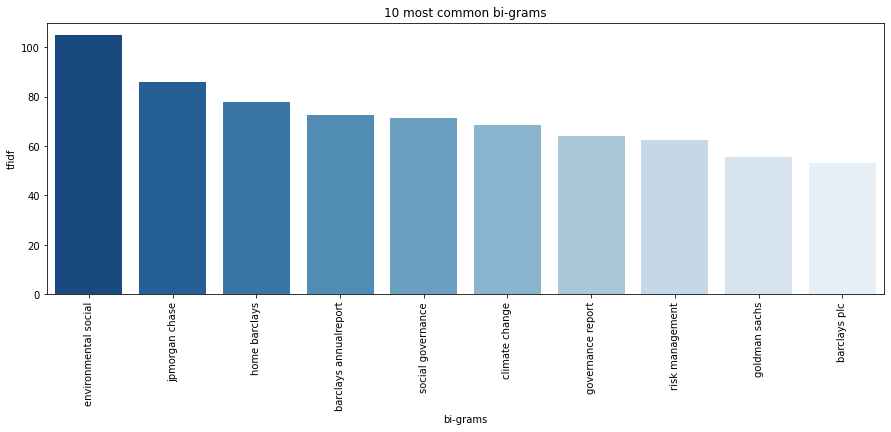

In [ ]:
# Word2Vec using fit transform
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
import seaborn as sns

#data_df['Content_lemma'] = [" ".join(u) for u in df['Content_lemma'].values]
lemmas = data_df['Content_lemma'].apply(lambda x: ' '.join(x))

# Run bi-gram TF-IDF frequencies
bigram_tf_idf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(2,2), min_df=10, use_idf=True)
bigram_tf_idf = bigram_tf_idf_vectorizer.fit_transform(lemmas)

# Extract bi-grams names
words = bigram_tf_idf_vectorizer.get_feature_names()

# extract our top 10 ngrams
total_counts = np.zeros(len(words))
for t in bigram_tf_idf:
    total_counts += t.toarray()[0]

count_dict = (zip(words, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words)) 

# Plot top 10 ngrams
plt.figure(figsize=(15, 5))
plt.subplot(title='10 most common bi-grams')
sns.barplot(x_pos, counts, palette='Blues_r')
plt.xticks(x_pos, words, rotation=90) 
plt.xlabel('bi-grams')
plt.ylabel('tfidf')
plt.show()


In [ ]:
# Continue Experiment

In [ ]:
import re
def clean_with_regex(text_values):
  sentences = []

  for i in text_values:
      #print(i+" Namratha")
    i = re.sub(r'^\s?\d+(.*)$', r'\1', i)
    i = i.strip()
    i = re.sub('\s?-\s?', '-', i)
    i = re.sub(r'\s?([,:;\.])', r'\1', i)
    i = re.sub(r'\d{5,}', r' ', i)
    i = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', r' ', i)
    i = re.sub('\s+', ' ', i)
    print(i)
    for part in list(nlp(i).sents):
      sentences.append(str(part).strip())
  return sentences

In [ ]:

#result = data_df.dtypes
#print(result)

# print first 5 rows
data_df.head()
# to see columns
data_df.columns
# to see columns
data_df.index



Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            29177, 29178, 29179, 29180, 29181, 29182, 29183, 29184, 29185,
            29186],
           dtype='int64', length=29187)

In [ ]:
data_df.values# print numpy arrays

array([['america',
        '1Bank of America Corporation 2017 Environmental, Social & Governance Performance Data Summary'],
       ['america', ''],
       ['america',
        'ESG Goals & Progress2$2 billion in philanthropic investments globally'],
       ...,
       ['jpmc2019', ''],
       ['jpmc2019',
        'report that identify other parties goods or services may be trademarks or service marks of those other parties.'],
       ['jpmc2019', '']], dtype=object)

In [ ]:
type(data_df)

pandas.core.frame.DataFrame

In [ ]:
# shows no of rows and column
data_df.shape # not callable

(29187, 2)

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29187 entries, 0 to 29186
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  29187 non-null  object
 1   Content  29187 non-null  object
dtypes: object(2)
memory usage: 684.1+ KB


In [ ]:
data_df['Content'].apply(lambda x:clean_with_regex(x)).transpose()

In [ ]:
company_col = data_df['Company']
type(company_col) # comes in series

pandas.core.series.Series

In [ ]:
subset_all = data_df[['Company','Content']] # List of list in python
subset_all.head()

,Company,Content
0,america,"1Bank of America Corporation 2017 Environmental, Social & Governance Performance Data Summary"
1,america,
2,america,ESG Goals & Progress2$2 billion in philanthropic investments globally
3,america,"2019In 2017, Bank of America provided nearly $200 million"
4,america,


In [ ]:
data_df.isnull()

AttributeError: ignored

In [ ]:

data_df

In [ ]:
# STOP 

In [ ]:
for i, j in data_df.iterrows():
    print(i, j)
    print()

In [ ]:
#data_df = data_df[data_df['Content'].map(len) < 2]
#data_df = data_df.convert_dtypes(convert_string=True)
#data_df
import re
import numpy as np
import pandas as pd
from pandas import DataFrame


result = data_df.dtypes
print(result)

# Iterate over two given columns
# only from the dataframe
clean_data = []
for column in data_df[['Company','Content']]:
    
    # Select column contents by column  
    # name using [] operator
    columnSeriesObj = data_df[column]
    #print('columnSeriesObj : ',columnSeriesObj)
    print('Column Name : ', column)
    print('Column Contents : ', columnSeriesObj.values)
    clean_data.append([column,clean_with_regex(columnSeriesObj.values)])
 
    """
    for i in columnSeriesObj.values:
      #print(i+" Namratha")
      i = re.sub(r'^\s?\d+(.*)$', r'\1', i)
      i = i.strip()
      i = re.sub('\s?-\s?', '-', i)
      i = re.sub(r'\s?([,:;\.])', r'\1', i)
      i = re.sub(r'\d{5,}', r' ', i)
      i = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', r' ', i)
      i = re.sub('\s+', ' ', i)
      clean_data.append([column,i])
      #print(i)
"""

#esg_clean_pd = DataFrame(clean_data)
#esg_clean_pd
clean_data

Company    object
Content    object
dtype: object
Column Name :  Company
Column Contents :  ['america' 'america' 'america' ... 'jpmc2019' 'jpmc2019' 'jpmc2019']
america
Column Name :  Content
Column Contents :  ['1Bank of America Corporation 2017 Environmental, Social & Governance Performance Data Summary'
 ''
 'ESG Goals & Progress2$2 billion in philanthropic investments globally'
 ... ''
 'report that identify other parties goods or services may be trademarks or service marks of those other parties.'
 '']
Bank of America Corporation 2017 Environmental, Social & Governance Performance Data Summary


[['Company', 'america'],
 ['Content',
  'Bank of America Corporation 2017 Environmental, Social & Governance Performance Data Summary']]

In [ ]:
# Stop here for now

In [ ]:
# Extract Statements

def extract_content(text):
    lines = ""
    prev = ""
    for line in text.split('\n'):
    # aggregate consecutive lines where text may be broken down
    # only if next line starts with a space or previous does not end with dot.
      if(line.startswith(' ') or not prev.endswith('.')):
        prev = prev + ' ' + line
      else:
        # new paragraph
        lines = lines+ " "+prev
        prev = line
        
  # don't forget left-over paragraph
    return lines+ " "+prev

#round1 = lambda x: extract_content(x)
#data_split = DataFrame(data_df['Content'].apply(round1))
#data_split

data_split = (data_df.set_index(['Company'])
   .apply(lambda x:extract_content(x))
   .reset_index())
data_split

AttributeError: ignored

In [ ]:
# Data cleaning for esg
import re
import string

def clean_text_two(text):
  # convert all text to lower case
  text = text.lower()
  # Remove header line
  text = re.sub(r'^\s?\d+(.*)$', r'\1', text)
  # remove trailing strip
  text = text.strip()
  # words may be split between lines, ensure we link them back together
  text = re.sub('\s?-\s?', '-', text)
  # remove space prior to punctuation
  text = re.sub(r'\s?([,:;\.])', r'\1', text)
  # ESG contains a lot of figures that are not relevant to grammatical structure
  text = re.sub(r'\d{5,}', r' ', text)
  # remove mentions of URLs
  text = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', r' ', text)
  # remove multiple spaces
  text = re.sub('\s+', ' ', text)
  # remone \n and in double codes
  text = re.sub('\n','',text)
  text = text.replace('™','')

  return text


round1 = lambda x: clean_text_two(x)

In [ ]:
data_reg = DataFrame(data_split['Content'].apply(round1))
data_reg

,Content
0,"1bank of america corporation 2017 environmental, social & governance performance data summary"
1,
2,esg goals & progress2$2 billion in philanthropic investments globally
3,"2019in 2017, bank of america provided nearly $200 million"
4,
...,...
29182,".jpmorgan chase, j.p. morgan, chase, the octagon symbol and other words or symbols in this report that"
29183,identify jpmorgan chase services are service marks of jpmorgan chase & co. other words or symbols in this
29184,
29185,report that identify other parties goods or services may be trademarks or service marks of those other parties.


In [ ]:
# From down here it is pyohio

In [ ]:
# Check data for america
#data_df.Content.loc['america'] // This is for pyohio nlp

In [ ]:
# Data cleaning for esg
import re
import string

def clean_text_one(text):
  # convert all text to lower case
  text = text.lower()
  # Remove header line
  text = re.sub(r'^\s?\d+(.*)$', r'\1', text)
  # remove trailing strip
  text = text.strip()
  # words may be split between lines, ensure we link them back together
  text = re.sub('\s?-\s?', '-', text)
  # remove space prior to punctuation
  text = re.sub(r'\s?([,:;\.])', r'\1', text)
  # ESG contains a lot of figures that are not relevant to grammatical structure
  text = re.sub(r'\d{5,}', r' ', text)
  # remove mentions of URLs
  text = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', r' ', text)
  # remove multiple spaces
  text = re.sub('\s+', ' ', text)
  # remone \n and in double codes
  text = re.sub('[''""...]','',text)
  text = re.sub('\n','',text)
  text = re.sub('\(.*?\)','',text)
  text = text.replace(',','')
  text = text.replace('%','')
  text = text.replace('$','')
  text = text.replace('™','')
  #text = re.sub('\d\w*)','',text)
  text = re.sub(r'[0-9]+', '', text)

  return text

round1 = lambda x: clean_text_one(x)

In [ ]:
data_clean = DataFrame(data_df.content.apply(round1))
data_clean

,transcript
america,bank of america corporation environmental soc...
apollo,esg summary annual report the esg opportunity...
barclays,barclays plc environmental social governance r...
goldman,goldman sachs sustainability report sustainab...
hsbc,hsbc holdings plc environmental social and gov...
jpmc2019,environmental social & governance report mess...


In [ ]:
# Pickel previous file of pandas dataframe
data_df.to_pickle('/content/drive/MyDrive/NLPFolder/transcripts/corpus.pkl')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(stop_words='english')#,ngram_range=(2,2)
data_cv = tv.fit_transform(data_clean.content)
data_dtm = pd.DataFrame(data = data_cv.toarray(),columns = tv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm


,aa,aaa,aaiarti,aas,abbreviations,abilities,ability,abl,able,abp,abreast,absence,absolute,abundance,abuse,abuses,ac,academy,acc,accelerate,accelerated,accelerating,accelerator,accept,acceptable,acceptance,accepted,access,accessed,accessibility,accessible,accessing,acclimation,accommodate,accomodationenergy,accordance,according,accordingly,account,accountability,...,ˇˇˆ,ˇˇˇˇour,ﬁall,ﬁanticipateﬂ,ﬁapollos,ﬁbanning,ﬁbelieveﬂ,ﬁchaseﬂ,ﬁcontinueﬂ,ﬁcreating,ﬁestimateﬂ,ﬁexcellentﬂ,ﬁexpectﬂ,ﬁforward,ﬁglass,ﬁi,ﬁintendﬂ,ﬁjp,ﬁjpmorgan,ﬁmanage,ﬁmayﬂ,ﬁnet,ﬁnew,ﬁprofessionalsﬂ,ﬁprojectﬂ,ﬁrackersﬂ,ﬁrent,ﬁrisk,ﬁsafety,ﬁseek,ﬁshouldﬂ,ﬁsoaring,ﬁsun,ﬁtargetﬂ,ﬁunderstanding,ﬁusing,ﬁvery,ﬁwest,ﬁwillﬂ,ﬂotherﬂ
america,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.012495,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008635,0.00000,0.000000,0.004675,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.010531,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.010531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
apollo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005298,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.007324,0.000000,0.00000,0.000000,0.007929,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.005298,0.004576,...,0.000000,0.000000,0.000000,0.008931,0.008931,0.00000,0.008931,0.00000,0.008931,0.000000,0.008931,0.000000,0.008931,0.007324,0.008931,0.000000,0.008931,0.00000,0.00000,0.000000,0.008931,0.000000,0.000000,0.000000,0.008931,0.008931,0.000000,0.000000,0.008931,0.000000,0.008931,0.008931,0.008931,0.008931,0.00000,0.008931,0.000000,0.008931,0.008931,0.000000
barclays,0.000000,0.008503,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.005044,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.003486,0.000000,0.004251,0.000000,0.000000,0.00000,0.000000,0.001887,0.003486,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.005886,0.002522,0.000000,0.002178,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004251,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
goldman,0.003142,0.000000,0.000000,0.012567,0.000000,0.002576,0.020503,0.00000,0.005592,0.00000,0.002576,0.006284,0.002576,0.003142,0.002175,0.000000,0.037702,0.000000,0.00000,0.026101,0.000000,0.004350,0.000000,0.002576,0.000000,0.00000,0.002576,0.037655,0.002576,0.002175,0.004350,0.002576,0.00000,0.00000,0.000000,0.000000,0.004350,0.001864,0.009319,0.003219,...,0.000000,0.000000,0.003142,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.003142,0.000000,0.003142,0.000000,0.002576,0.000000,0.000000,0.000000,0.00000,0.00000,0.003142,0.000000,0.003142,0.003142,0.000000,0.000000,0.000000,0.003142,0.003142,0.000000,0.003142,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.003142,0.000000,0.000000,0.003142
hsbc,0.000000,0.000000,0.002869,0.000000,0.014344,0.000000,0.025529,0.00000,0.011913,0.00000,0.002352,0.000000,0.000000,0.000000,0.009930,0.014344,0.000000,0.002869,0.00000,0.001986,0.004705,0.003972,0.000000,0.000000,0.002352,0.00000,0.002352,0.030563,0.000000,0.003972,0.011917,0.002352,0.00000,0.00000,0.000000,0.007057,0.003972,0.001702,0.025529,0.002939,...,0.002869,0.002869,0.000000,0.000000,0.000000,0.00000,0.00